## Import Libraries and Data Files 

In [1]:
%run setup.ipynb
%run functions.ipynb

## Load Dataframe

In [2]:
# create dataframe of competitors from 2008-2023
total_dev_horses = merged_df.loc[(merged_df['Year'] <= 2023) &
                             (merged_df['Division'].str.contains('DHPSG|DHGP'))]

# drop duplicate USDF numbers so we only count each horse once
total_dev_horses = total_dev_horses.drop_duplicates(subset=['USDFNumber'])

total_dev_horses

,Year,Division,Horse,OverallPlacing,USDFNumber,OverallScore,Highest Level,CDI Competitor,Sire,Damsire,Country Bred,Breeder,Studbook,InternationalTeam,Team Made,AverageGP,FirstYear,LastYear
115,2007,DHPSG,Don Angelo,1,1043373,70.000,Grand Prix,Yes,Don Larino,Rubinstein,Germany,Harmut Janssen,Oldenburg,No,NaN,66.167,2006,2012
116,2007,DHPSG,Come On II,2,1043143,68.250,Grand Prix,Yes,Come Back II,Lantaan,Denmark,M. OG B. Klove-Morgensen,Danish Warmblood,No,NaN,67.527,2006,2015
117,2007,DHPSG,Don Principe,4,1033231,66.919,Grand Prix,Yes,Donnerhall,Prince Thatch xx,Germany,A. Bruening,Hanoverian,No,NaN,65.467,2005,2019
118,2007,DHPSG,Sandor,3,1016724,66.917,Grand Prix,Yes,Flemmingh,Blanc Rivage xx,Netherlands,ASM Bergmans-Wagemans,KWPN,No,NaN,63.334,2004,2015
119,2007,DHPSG,Farinelli,5,1043152,65.917,Grand Prix,Yes,Florestan I,Weltmeyer,Germany,Hannelore Mainka,Westfalen,No,NaN,68.298,2005,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2023,DHPSG,MW Weissgold,8,1141945,65.726,Prix St. Georges,No,Grey Flanell,Sir Donnerhall I,USA,Jennifer Vanover,Oldenburg,No,NaN,NaN,2020,2024
1159,2023,DHPSG,Altitude's Sonegro PS,9,1142746,63.802,Prix St. Georges,No,Soiree d'Amour,Negro,Germany,Gestut Lewitz,Hanoverian,No,NaN,NaN,2020,2024
1160,2023,DHPSG,Giovanni-Bell,10,1157255,43.333,Prix St. Georges,No,Grand Galaxy Win,Maat I,Denmark,Tina Jepsen,Danish Warmblood,No,NaN,NaN,2023,2024
1161,2023,DHPSG,S Express,11,1158953,39.778,I-2,Yes,Sezuan,Sir Donnerhall I,Germany,Cathrin Schlemper,Westfalen,No,NaN,NaN,2024,2024


In [3]:
total_dev_horses.describe()

,Year,OverallPlacing,USDFNumber,OverallScore,AverageGP,FirstYear,LastYear
count,283.000000,283.000000,2.830000e+02,283.000000,186.000000,283.000000,283.000000
mean,2015.473498,7.399293,1.073206e+06,65.907360,65.602430,2012.328622,2020.424028
std,4.770830,4.098901,1.425128e+05,5.482165,2.902922,4.960281,4.228037
min,2007.000000,1.000000,3.978900e+04,26.490000,53.617000,2002.000000,2007.000000
25%,2012.000000,4.000000,1.067603e+06,64.199500,63.828250,2008.000000,2018.000000
50%,2016.000000,7.000000,1.095097e+06,66.606000,65.837500,2012.000000,2022.000000
75%,2020.000000,11.000000,1.117540e+06,68.875000,67.414250,2016.000000,2024.000000
max,2023.000000,17.000000,1.158953e+06,76.515000,73.210000,2024.000000,2024.000000


In [5]:
# get number of horses in the Developing Horse divisions over all years of the program (2008-2023)
dev_horse_count = len(total_dev_horses)

print(f"The total number of horses competing over all years is {dev_horse_count}.")

The total number of horses competing over all years is 283.


## Analysis of Competitive Outcomes, 2008-2023
This year range was selected because all horses that competed in the Developing Prix St. Georges division in this time frame are old enough to have competed at the highest level, Grand Prix (minimum age allowed with both USEF and FEI is 8, although it is uncommon for a horse that young to be competing at that level).

### Breakdown of Developing Horse Division Competitors by Highest Level of Competition Achieved

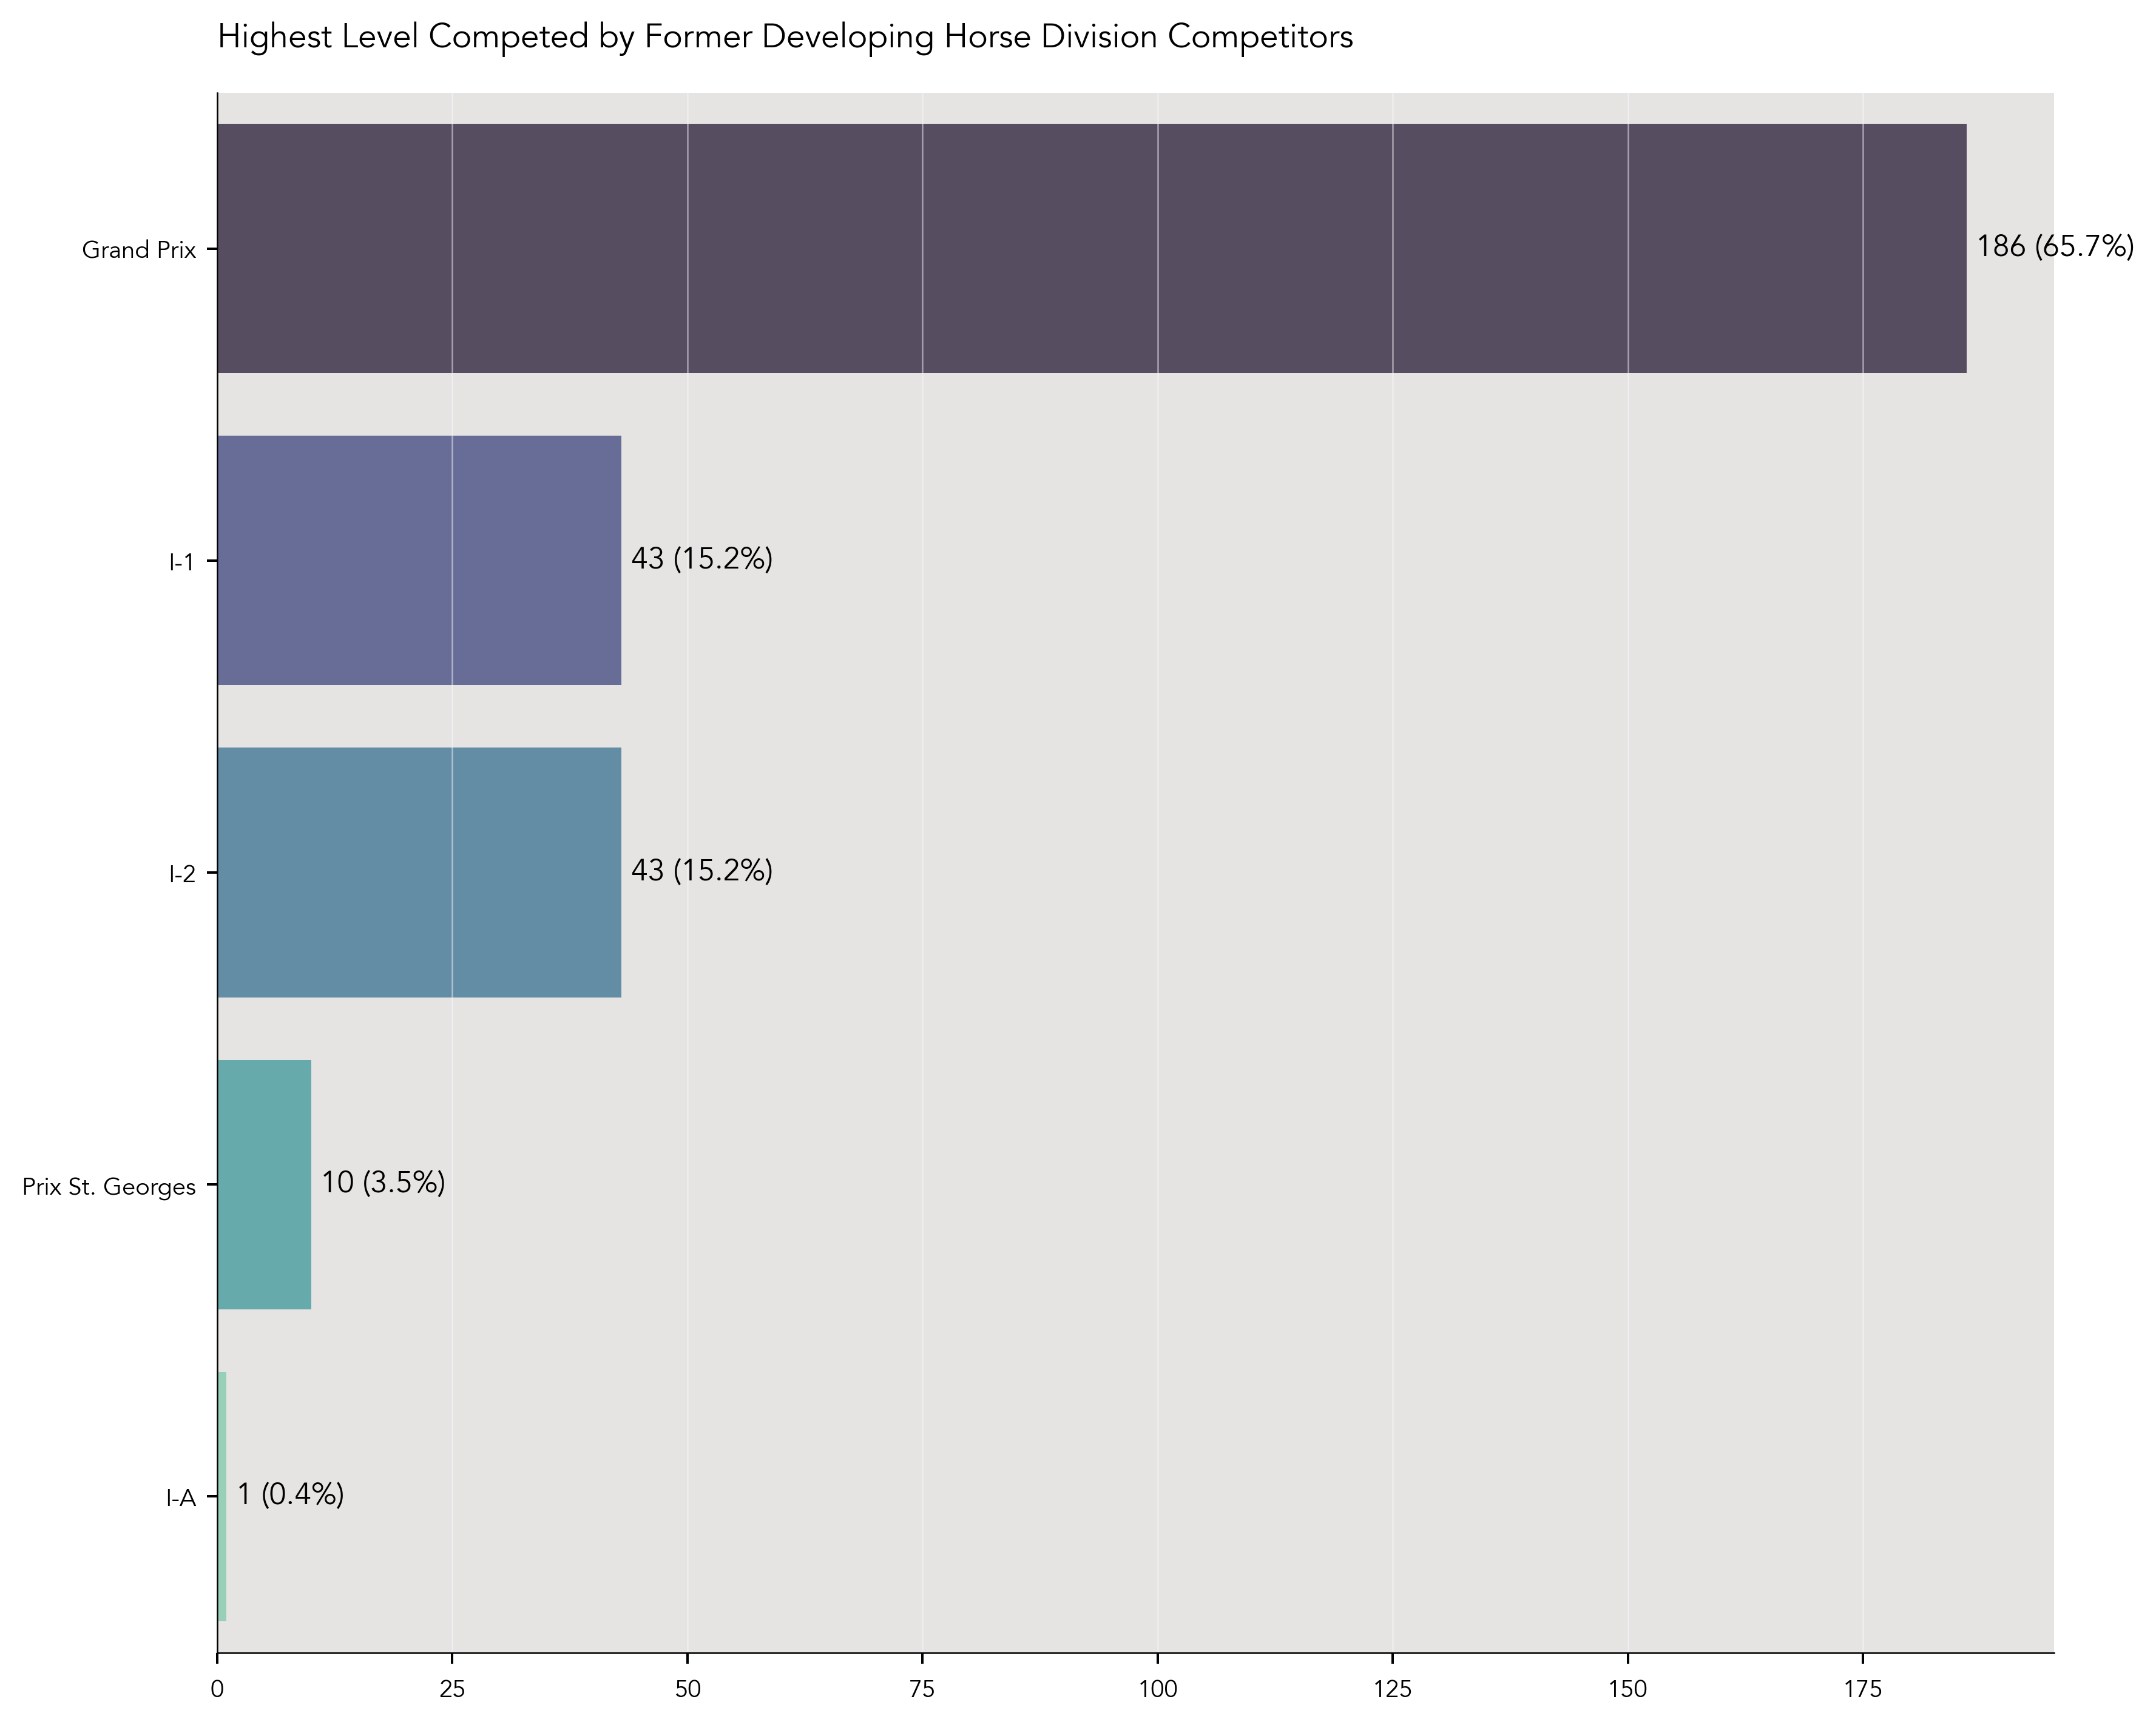

In [6]:
# create a countplot to display the breakdown of highest level competed

# set figure size
ax = plt.subplots(figsize=(10, 8))

# set counplot options
ax = sns.countplot(
   y = 'Highest Level',
   data = total_dev_horses,
   palette = sns.color_palette('mako', 5),
   hue = 'Highest Level',
   hue_order = total_dev_horses['Highest Level'].value_counts().index,
   alpha = 0.8,
   order = total_dev_horses['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/dev_horse_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest Level Competed by Former Developing Horse Division Competitors', loc='left')
ax.set_xlabel(None)
ax.set_ylabel(None)

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-highest-level-breakdown.png')
plt.show()

### CDI (Concours de Dressage International) Developing Horse Division Competitor Statistics

In [7]:
# get the horses that have competed in at least one CDI (any level other than Young Horse divisions)
dev_cdi_horses = total_dev_horses.loc[(total_dev_horses['CDI Competitor'] == 'Yes')]

# count the CDI horses by USDF number
dev_cdi_count = dev_cdi_horses['USDFNumber'].nunique()

print(f"The number of CDI competitors is {dev_cdi_count}.")

The number of CDI competitors is 191.


In [8]:
# get the overall percentage of horses that competed in at least one CDI 
dev_cdi_percentage = (dev_cdi_count / dev_horse_count) * 100

# round the percentage
dev_cdi_percentage = round(dev_cdi_percentage, 2)

# print to console
print(f"The percentage of CDI competitors is {dev_cdi_percentage}%")

The percentage of CDI competitors is 67.49%


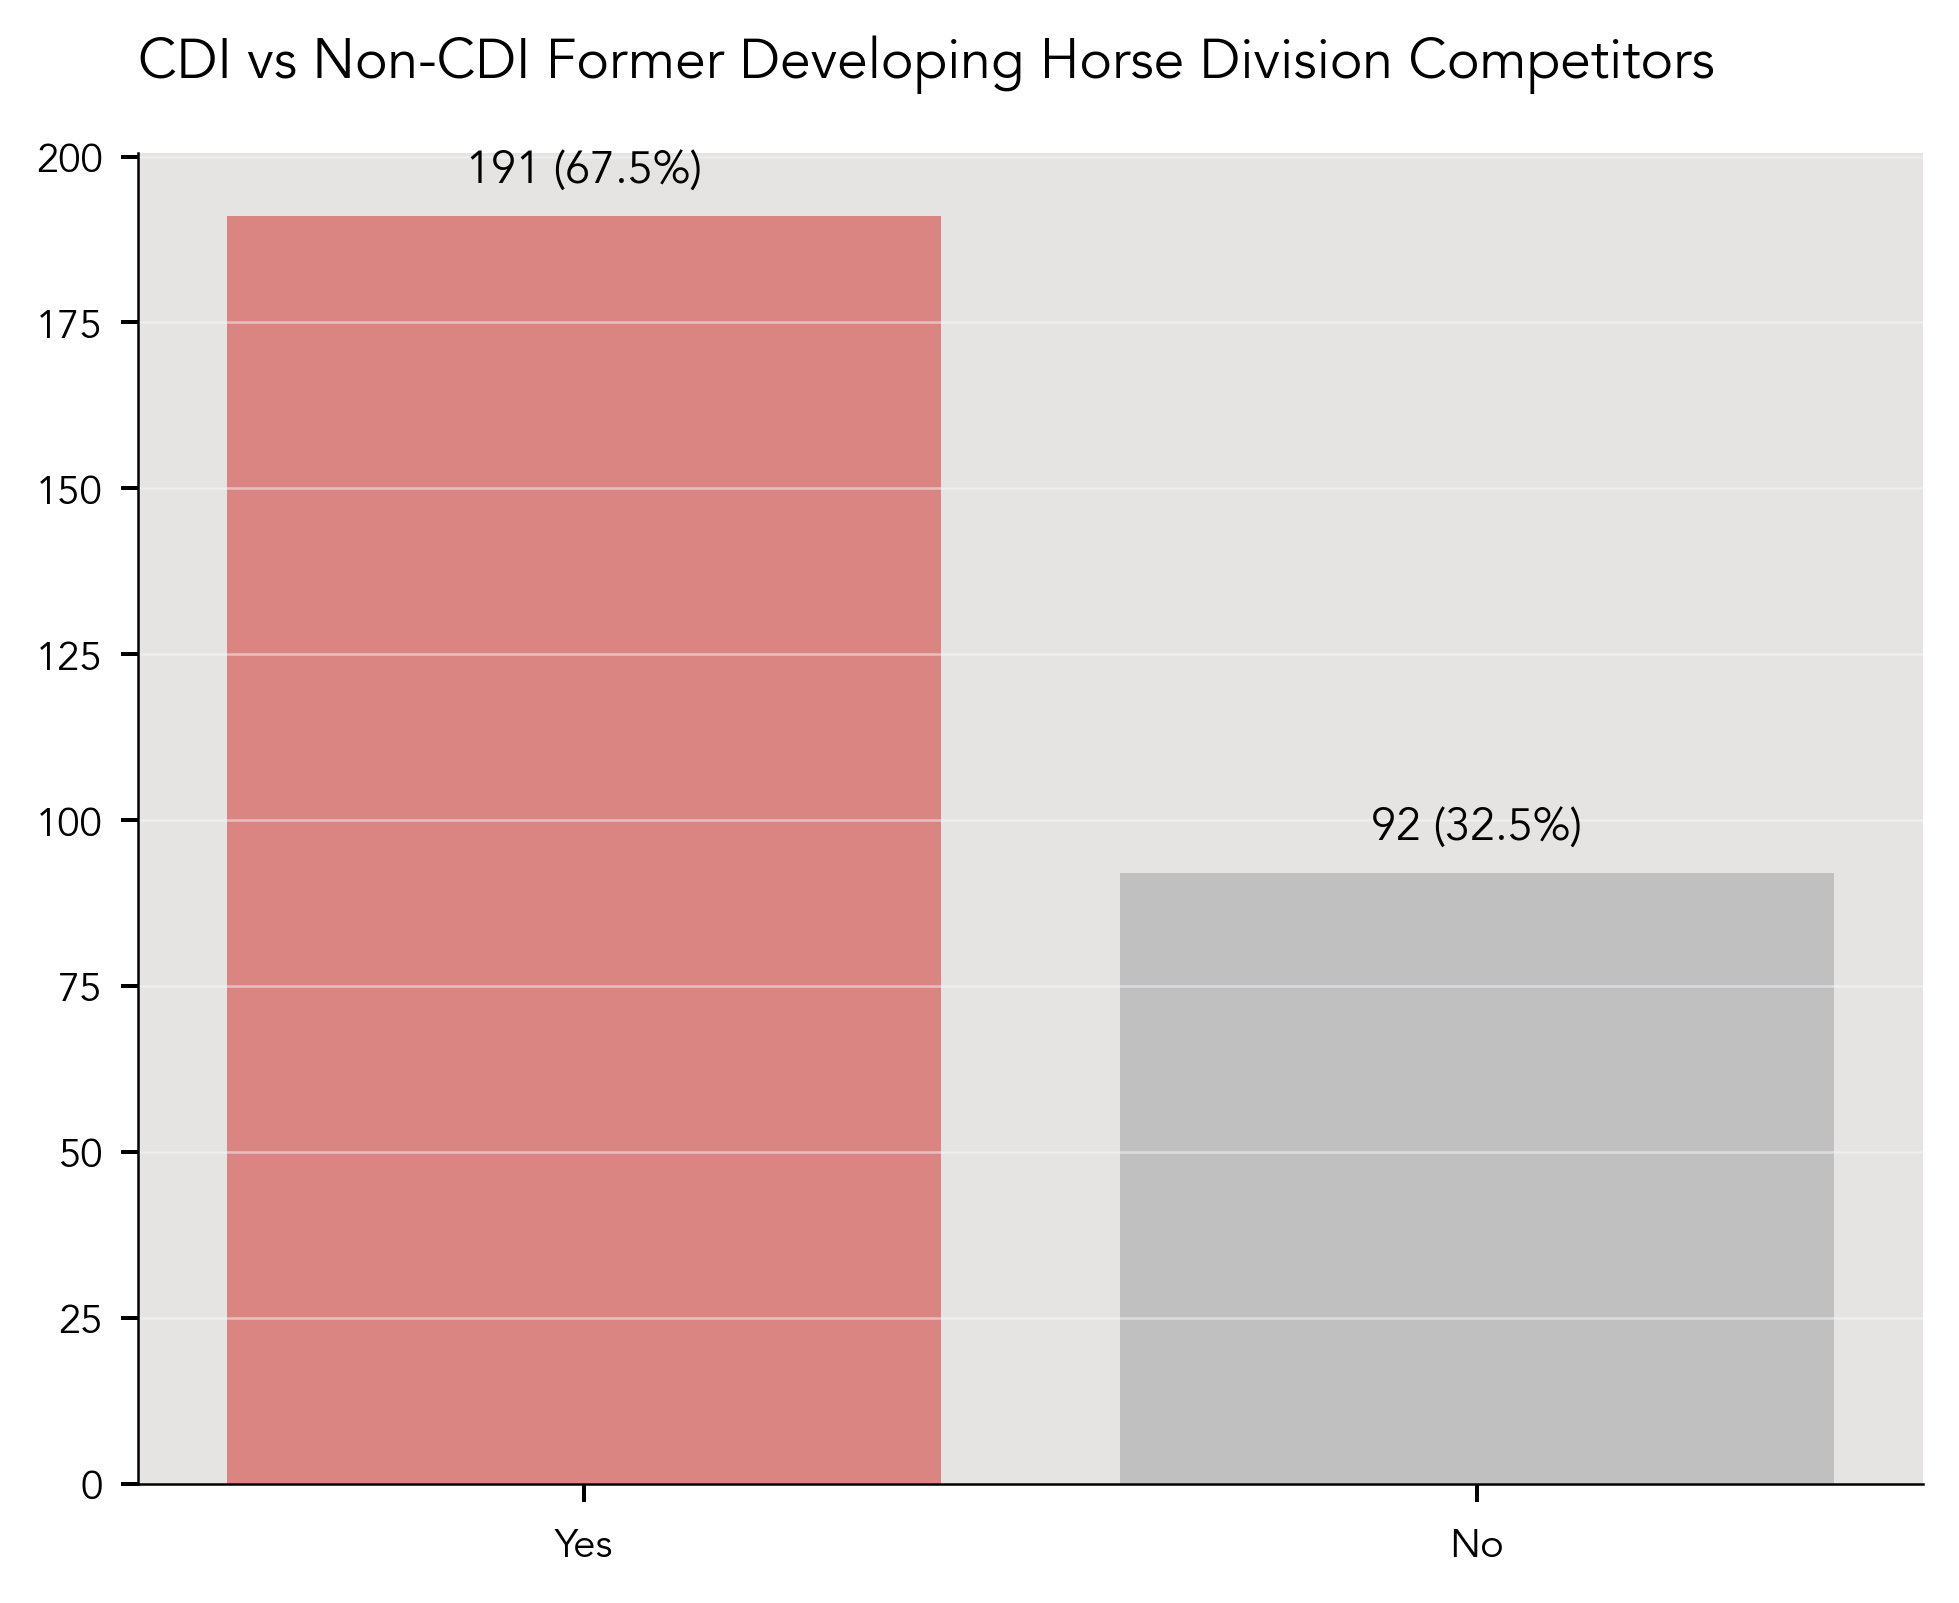

In [30]:
#  create a countplot to visualize CDI vs non-CDI horse data

# set options for countplot
ax = sns.countplot(
   x = 'CDI Competitor',
   data = total_dev_horses,
   palette = ['#ec5b57', '#b7b8b8'],
   hue = 'CDI Competitor', 
   alpha = .8,
   order = total_dev_horses['CDI Competitor'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_horse_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('CDI vs Non-CDI Former Developing Horse Division Competitors', loc='left')
ax.set_xlabel(None)
ax.set_ylabel(None)

# save and show figure
plt.savefig('images/dh-cdi-competitors.png')
plt.show()

### Developing Horse Division International Team Horse Statistics

In [10]:
# select the horses that went on to make an international team (Pan American, World Equestrian, or Olympic Games) 
dev_team_df = total_dev_horses[(total_dev_horses['InternationalTeam'] == 'Yes')]


# drop unnecessary columns
dev_team_df = dev_team_df.drop(columns =['Year', 'Division', 'OverallPlacing', 'OverallScore','CDI Competitor', 'USDFNumber', 'Highest Level', 'InternationalTeam'])

# show dataframe
dev_team_df

# print to markdown
#print(dev_team_df.to_markdown())

,Horse,Sire,Damsire,Country Bred,Breeder,Studbook,Team Made,AverageGP,FirstYear,LastYear
179,Grandioso,Grosso Z,Palisandergrund,Germany,Willi Hillebrecht,Westfalen,Pan American Games,NaN,2006,2011
293,Rosevelt,Rotspon,Lauries Crusador xx,Germany,Henry Peters,Hanoverian,Olympic Games,70.347,2010,2016
533,Sanceo,San Remo,Ramiro's Son II,Germany,Gerhard Dustmann,Hanoverian,Olympic Games and Pan American Games,73.210,2010,2021
729,Lucky Strike,Lord Laurie,His Highness,Germany,Monika Hartwitch,Hanoverian,Pan American Games,NaN,2014,2023
732,Faro SQF,Fidertanz,Rotspon,USA,Star Quarry Farm,Hanoverian,Pan American Games,67.756,2012,2024
937,Fire Fly,Briar Junior,OO Seven,Netherlands,Anton Geessink,KWPN,Pan American Games,68.065,2019,2024
1069,Jane,Desperado,Metall,Netherlands,H.J. Van Oort,KWPN,Olympic Games,70.878,2018,2024


In [11]:
# get the percentage of horses that made an international team

# get the count of team horses
dev_team_count = len(dev_team_df)

# calculate the percentage
dev_team_percentage = (dev_team_count / dev_horse_count) * 100

# round the percentage
dev_team_percentage = round(dev_team_percentage, 1)

# print to console
print(f"The percentage of horses that made an international team is {dev_team_percentage}%")

The percentage of horses that made an international team is 2.5%


In [48]:

dev_scores_df = merged_df.loc[(merged_df['Year'] <= 2023) &
                            (merged_df['Division'].str.contains('DHPSG|DHGP')) & (merged_df['Highest Level'] == 'Grand Prix')].copy()


# new column with result of function  
dev_scores_df['ScoreRank'] = dev_scores_df['OverallScore'].apply(dh_check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 65.9 that we keep the higher score
dev_scores_df = dev_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

#print(dev_scores_df.to_markdown())


dev_gp_count = len(dev_scores_df)

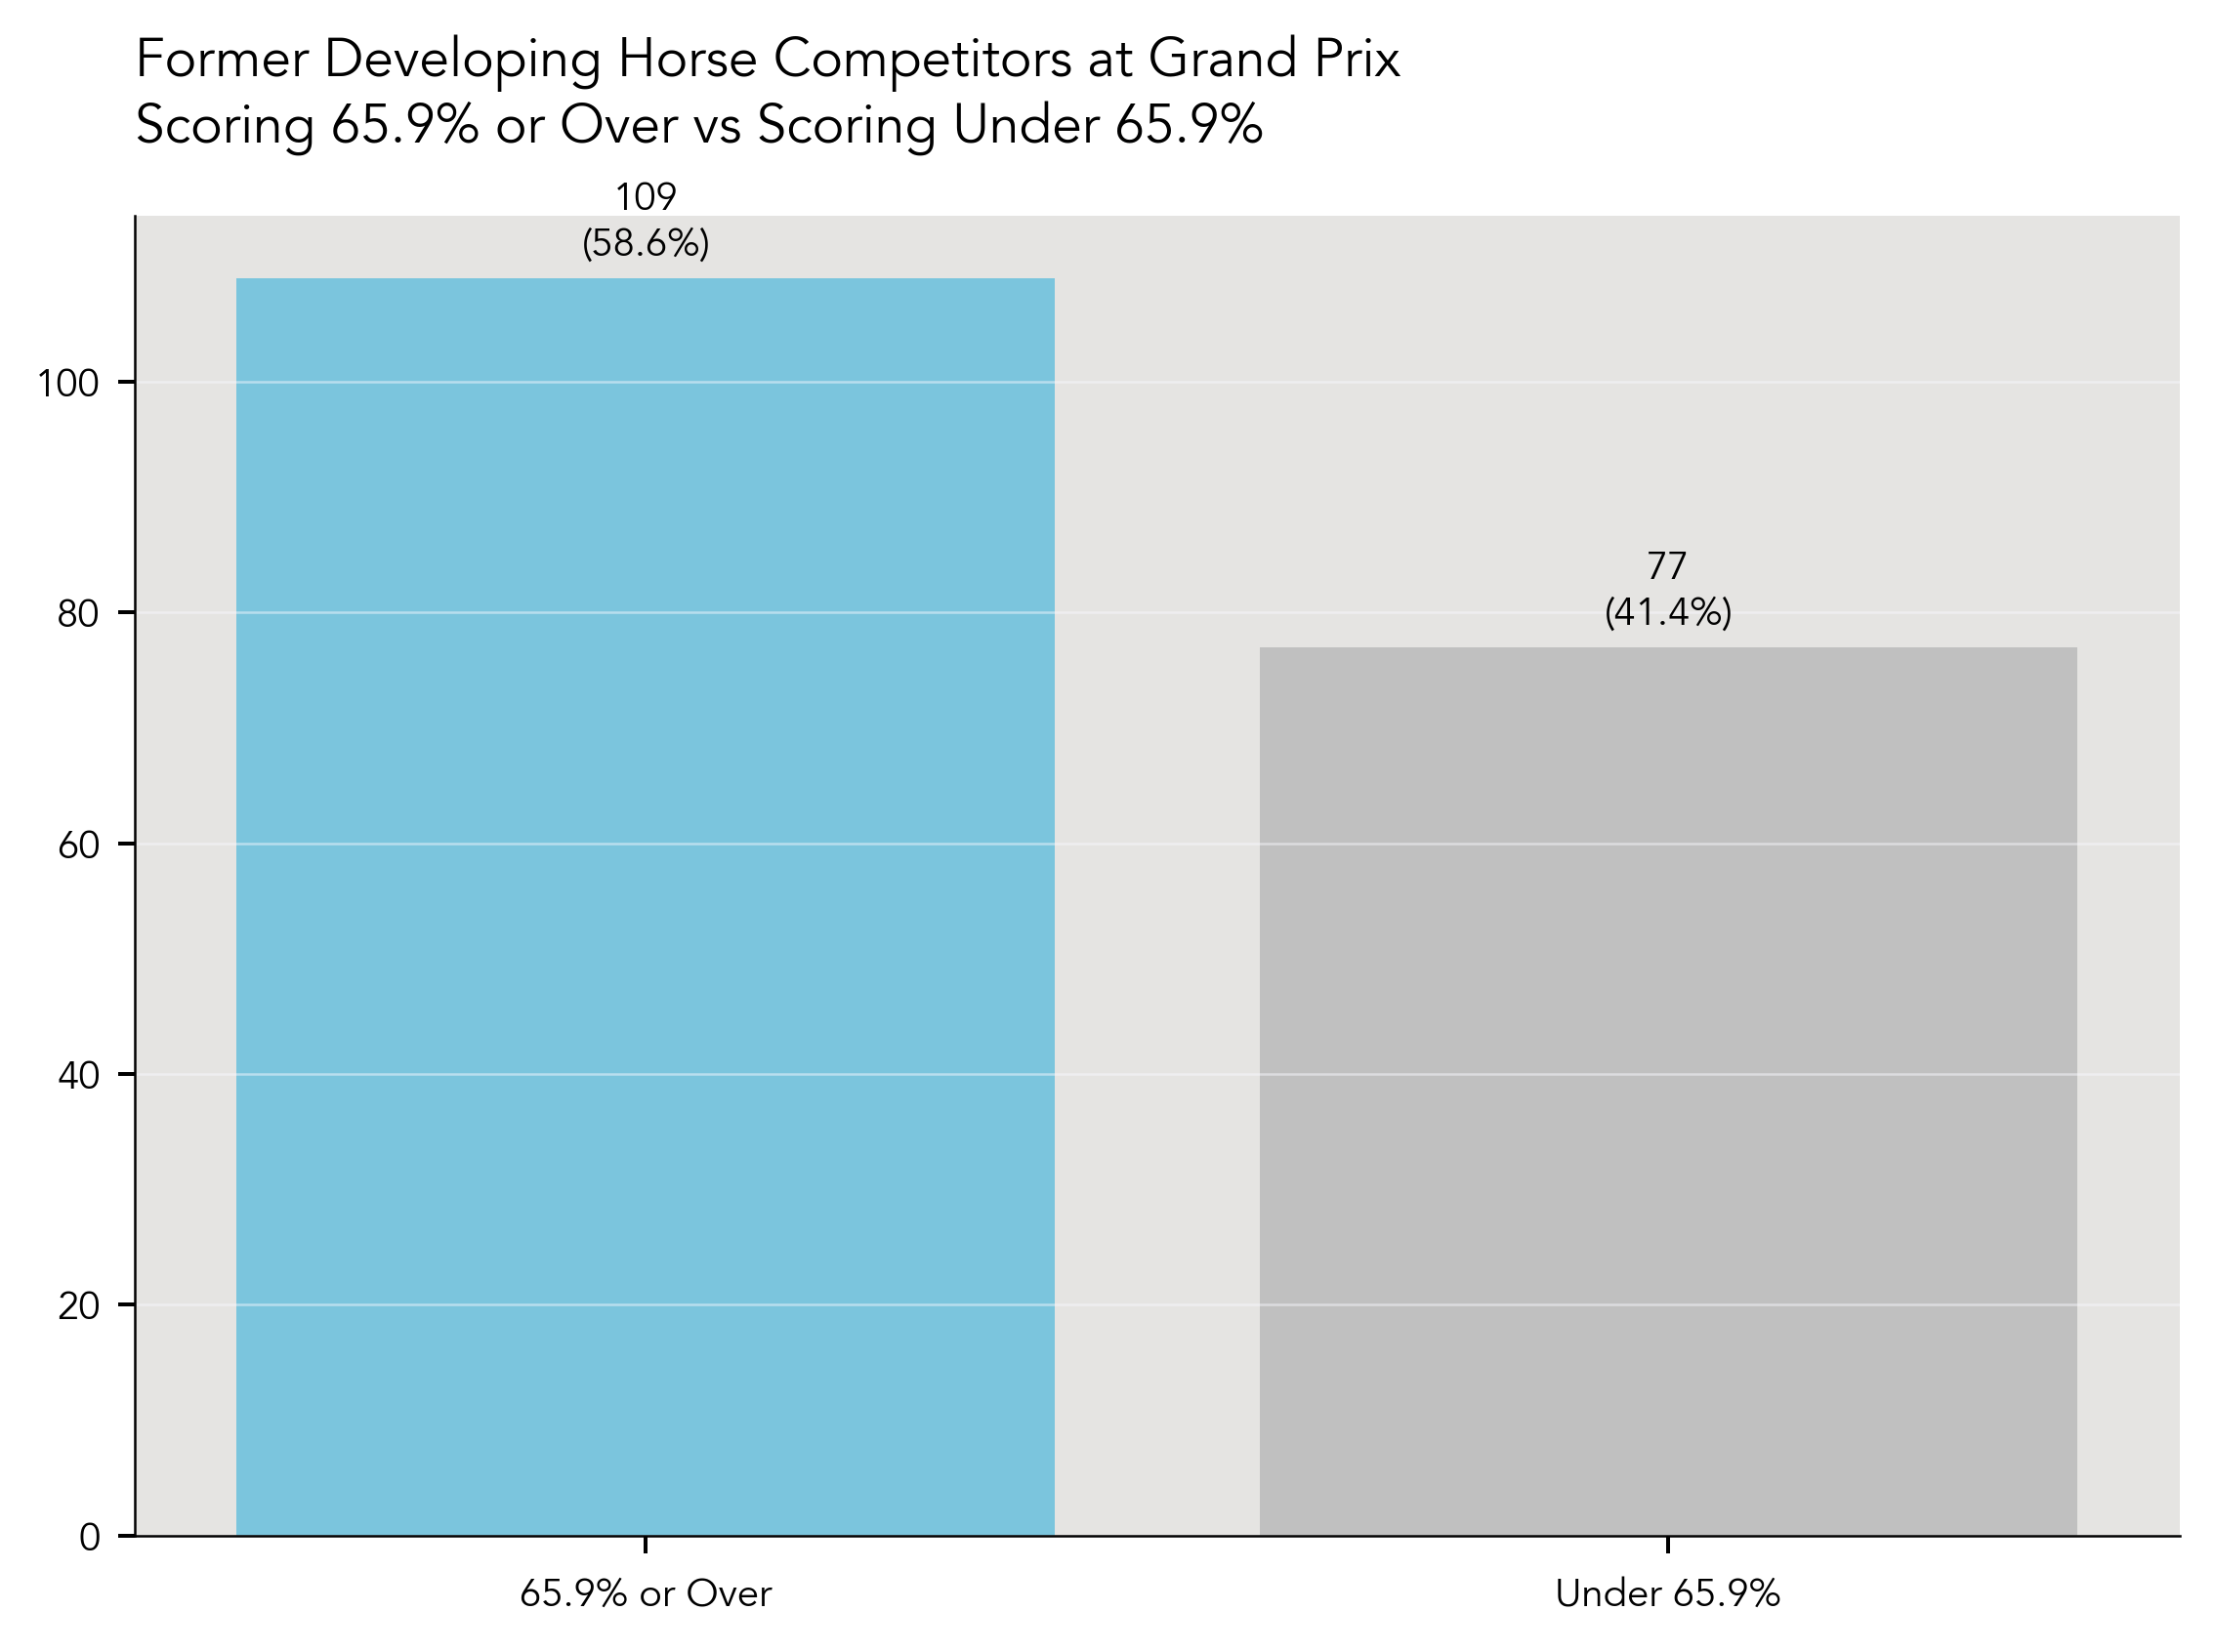

In [47]:

# set options for countplot
ax = sns.countplot(
   x = 'ScoreRank',
   data = dev_scores_df,
   palette = ['#4cc9f0', '#b7b8b8'],
   hue = 'ScoreRank',
   alpha = .8,
   order = dev_scores_df['ScoreRank'].value_counts().index
)

# add annotation for count and percentage of each score group
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_gp_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Former Developing Horse Competitors at Grand Prix\nScoring 65.9% or Over vs Scoring Under 65.9%', loc='left')
ax.set_ylabel(None)
ax.set_xlabel(None)

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-grand-prix-by-overall-score.png')
plt.show()

In [11]:
chi_dev_scores_df = merged_df.loc[(merged_df['Year'] <= 2023) &
                            (merged_df['Division'].str.contains('DHPSG|DHGP'))].copy()


# new column with result of function  
chi_dev_scores_df['IsGP'] = chi_dev_scores_df['Highest Level'].apply(gp_or_no)    

# new column with result of function  
chi_dev_scores_df['ScoreRank'] = chi_dev_scores_df['OverallScore'].apply(dh_check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 65.9 that we keep the higher score
chi_dev_scores_df = chi_dev_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

print(chi_dev_scores_df.to_markdown())

|      |   Year | Division   | Horse                       |   OverallPlacing |   USDFNumber |   OverallScore | Highest Level    | CDI Competitor   | Sire                  | Damsire                    | Country Bred   | Breeder                               | Studbook                                                | InternationalTeam   | Team Made                            |   AverageGP |   FirstYear |   LastYear | IsGP   | ScoreRank     |
|-----:|-------:|:-----------|:----------------------------|-----------------:|-------------:|---------------:|:-----------------|:-----------------|:----------------------|:---------------------------|:---------------|:--------------------------------------|:--------------------------------------------------------|:--------------------|:-------------------------------------|------------:|------------:|-----------:|:-------|:--------------|
|  115 |   2007 | DHPSG      | Don Angelo                  |                1 |      1043373 |         70     

In [12]:
# create contingency table
contingency_table = pd.crosstab(chi_dev_scores_df['ScoreRank'], chi_dev_scores_df['IsGP'])

print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

IsGP           No  Yes
ScoreRank             
65.9% or Over  66  109
Under 65.9%    31   77
Chi-Square statistic: 2.0235965485296195
P-Value: 0.15487194436750296
Degrees of Freedom: 1
Expected Frequencies: [[ 59.98233216 115.01766784]
 [ 37.01766784  70.98233216]]
p value is 0.15487194436750296
Independent (H0 holds true)


### Developing Horse and Young Horse Competitors 

In [21]:
# get the horses that competed in at least one Young Horse division and one Developing Horse division

# set variables for each division
yh = {'USEF4', 'FEI5', 'FEI6'}
dh = {'DHPSG', 'DHGP'}

# create dataframe
yh_and_dh = merged_df.loc[((merged_df['Year'] <= 2023))].copy()

# group by USDF number
g = yh_and_dh.groupby('USDFNumber')

# create new column with result 
yh_and_dh['BothDivisions'] = (g['Division'].transform(lambda x: x.isin(yh).any()))&(g['Division'].transform(lambda x: x.isin(dh).any()))
yh_and_dh['BothDivisions'] = yh_and_dh['BothDivisions'].replace({True: 'Yes', False: 'No'})
yh_and_dh = yh_and_dh.drop_duplicates(subset=['USDFNumber'], keep='last')
yh_and_dh = yh_and_dh.loc[(yh_and_dh['Division'].str.contains('DHPSG|DHGP'))]

#print(yh_and_dh.to_markdown())


# get a count of all horses that competed in both divisions
yh_and_dh_count = len(yh_and_dh.loc[(yh_and_dh['BothDivisions'] == 'Yes')])

# get all horses that competed in both divisions and went on to compete at Grand Prix
yh_and_dh_gp = yh_and_dh.loc[(yh_and_dh['Highest Level'] == 'Grand Prix') & (yh_and_dh['BothDivisions'] == 'Yes')]


# get a count of all horses that competed in both divisions and went on to compete at Grand Prix
yh_and_dh_gp_count = len(yh_and_dh_gp)

# get percentage of horses that competed in both divisions
yh_dh_percentage = (yh_and_dh_count / dev_horse_count) * 100
yh_dh_percentage = round(yh_dh_percentage, 1)

# get percentage of horses that competed in both divisions that went on to Grand Prix
yh_dh_gp_percentage = (yh_and_dh_gp_count / dev_horse_count) * 100
yh_dh_gp_percentage = round(yh_dh_gp_percentage, 1)

#print(yh_and_dh.to_markdown())

print(f"There were {yh_and_dh_count} horses ({yh_dh_percentage}%) that competed in at least one Young Horse division and one Developing Horse division.")
print(f"There were {yh_and_dh_gp_count} horses ({yh_dh_gp_percentage}%) that competed in at least one Young Horse division and one Developing Horse division, and went on to compete at Grand Prix.")


There were 107 horses (37.8%) that competed in at least one Young Horse division and one Developing Horse division.
There were 65 horses (23.0%) that competed in at least one Young Horse division and one Developing Horse division, and went on to compete at Grand Prix.


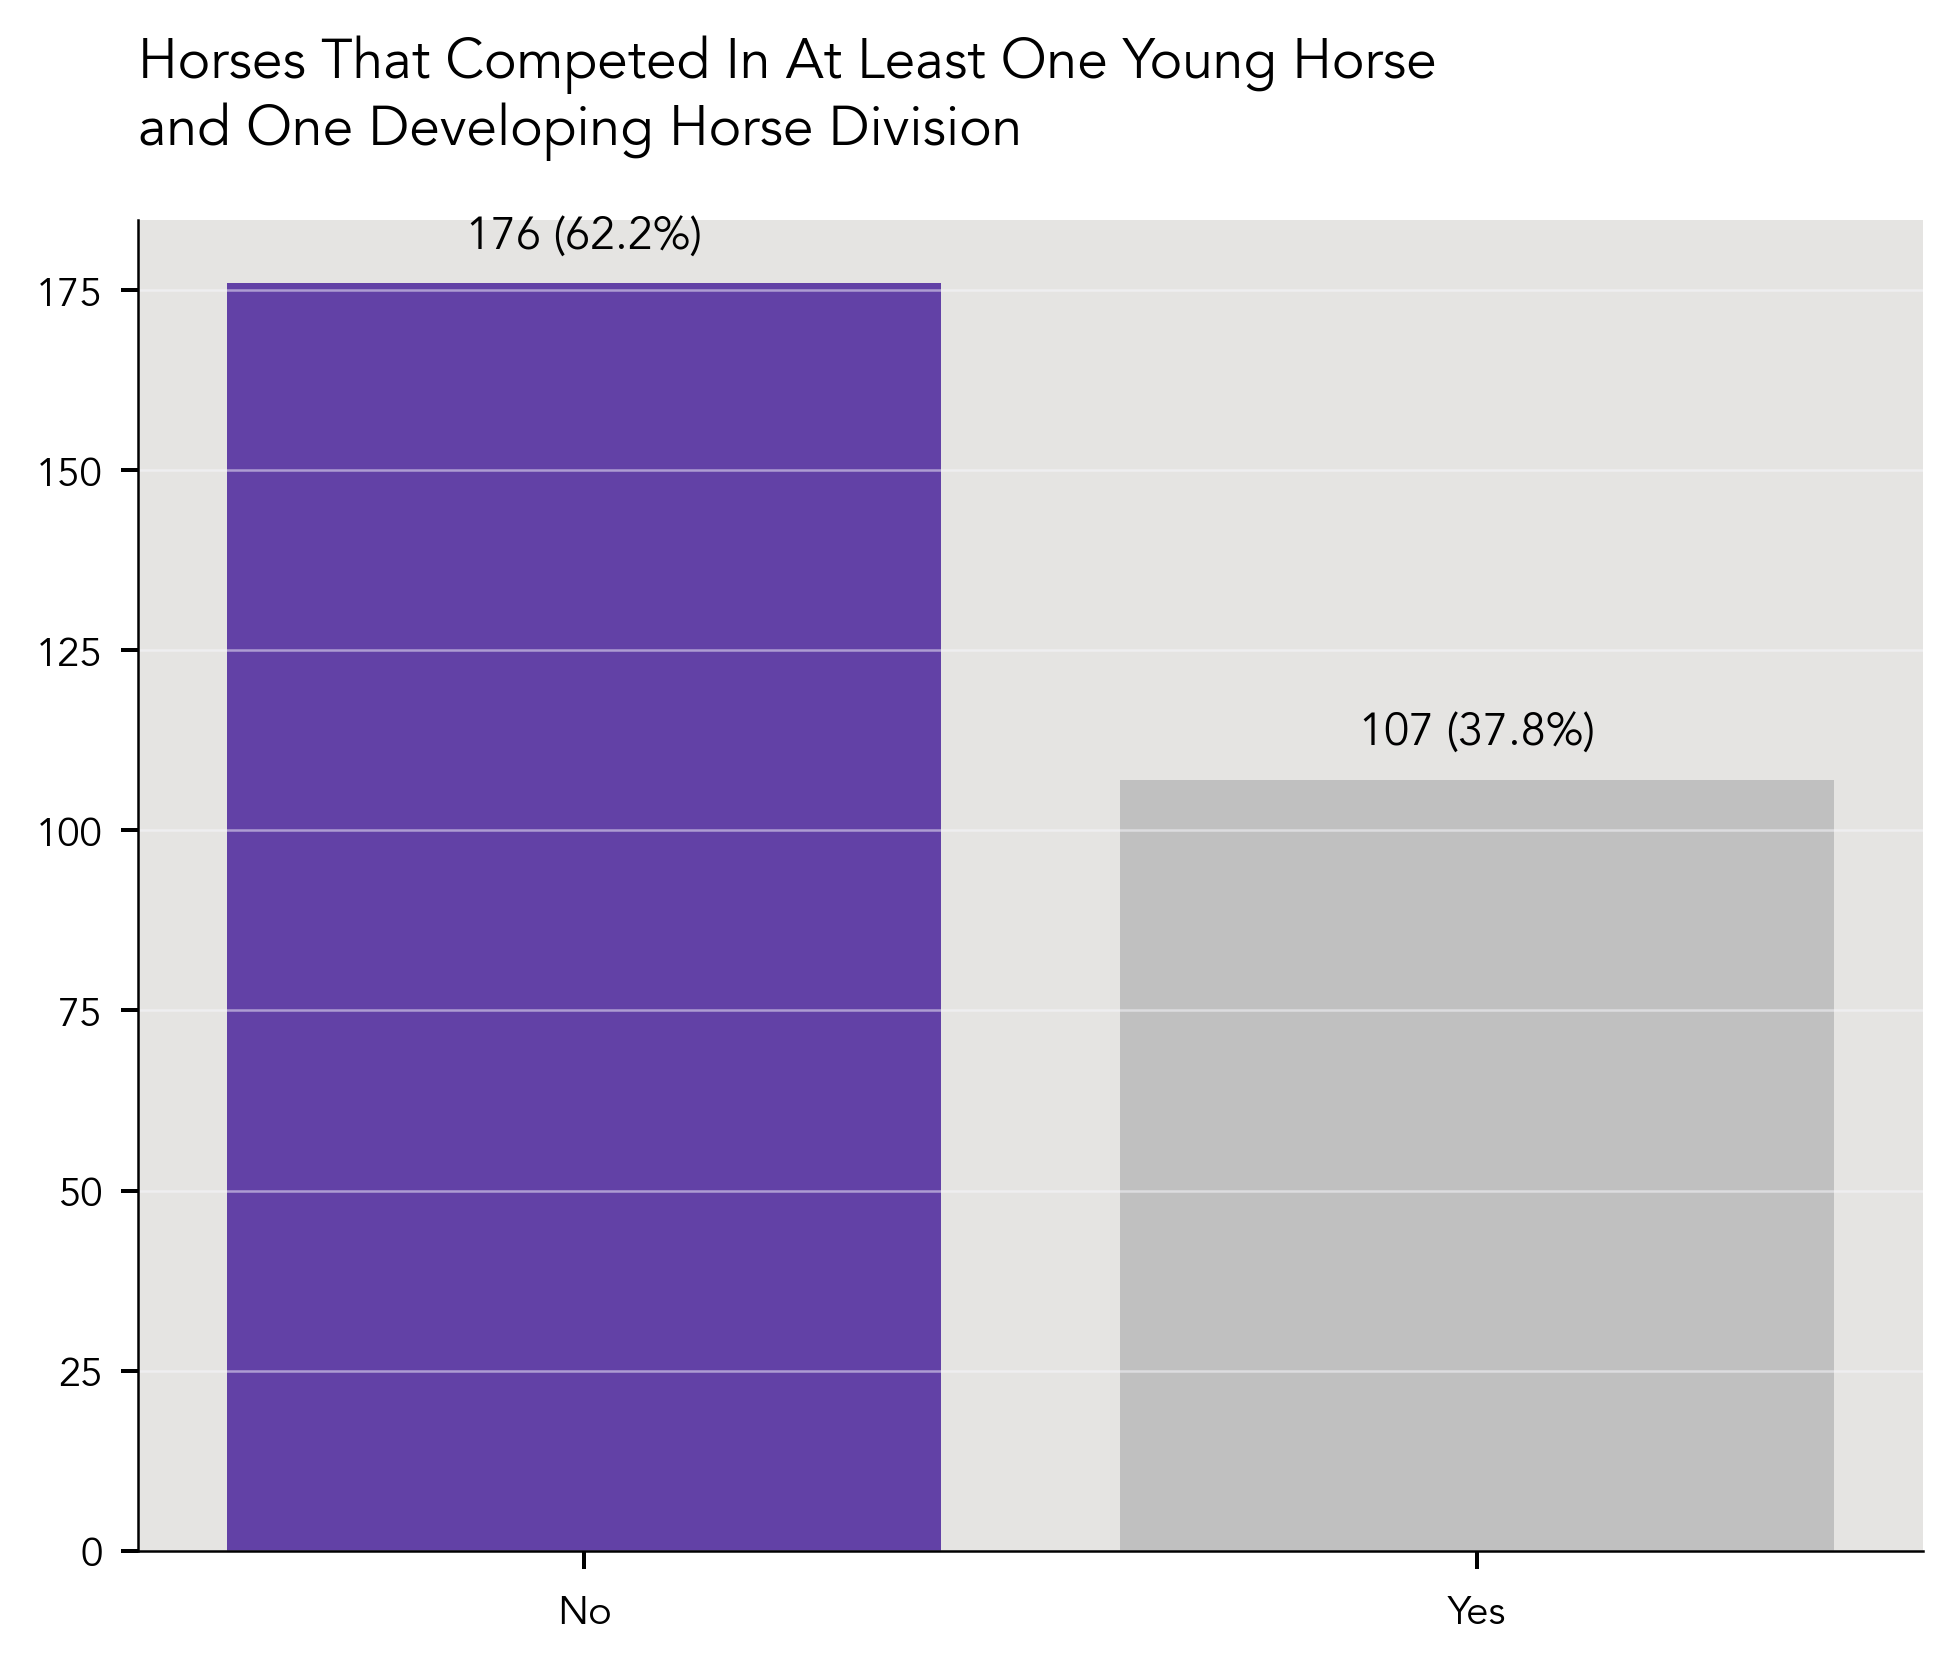

In [26]:
#  create a countplot to visualize horses that competed in both divisions

# set options for countplot
ax = sns.countplot(
   x = 'BothDivisions',
   data = yh_and_dh,
   palette = ['#3a03ac', '#b7b8b8'],
   alpha = .8,
   hue = 'BothDivisions',
   order = yh_and_dh['BothDivisions'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_horse_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('Horses That Competed In At Least One Young Horse\nand One Developing Horse Division', loc='left')
ax.set_xlabel(None)
ax.set_ylabel(None)

# save and show figure
plt.savefig('images/yh-and-dh-competitors.png')
plt.show()

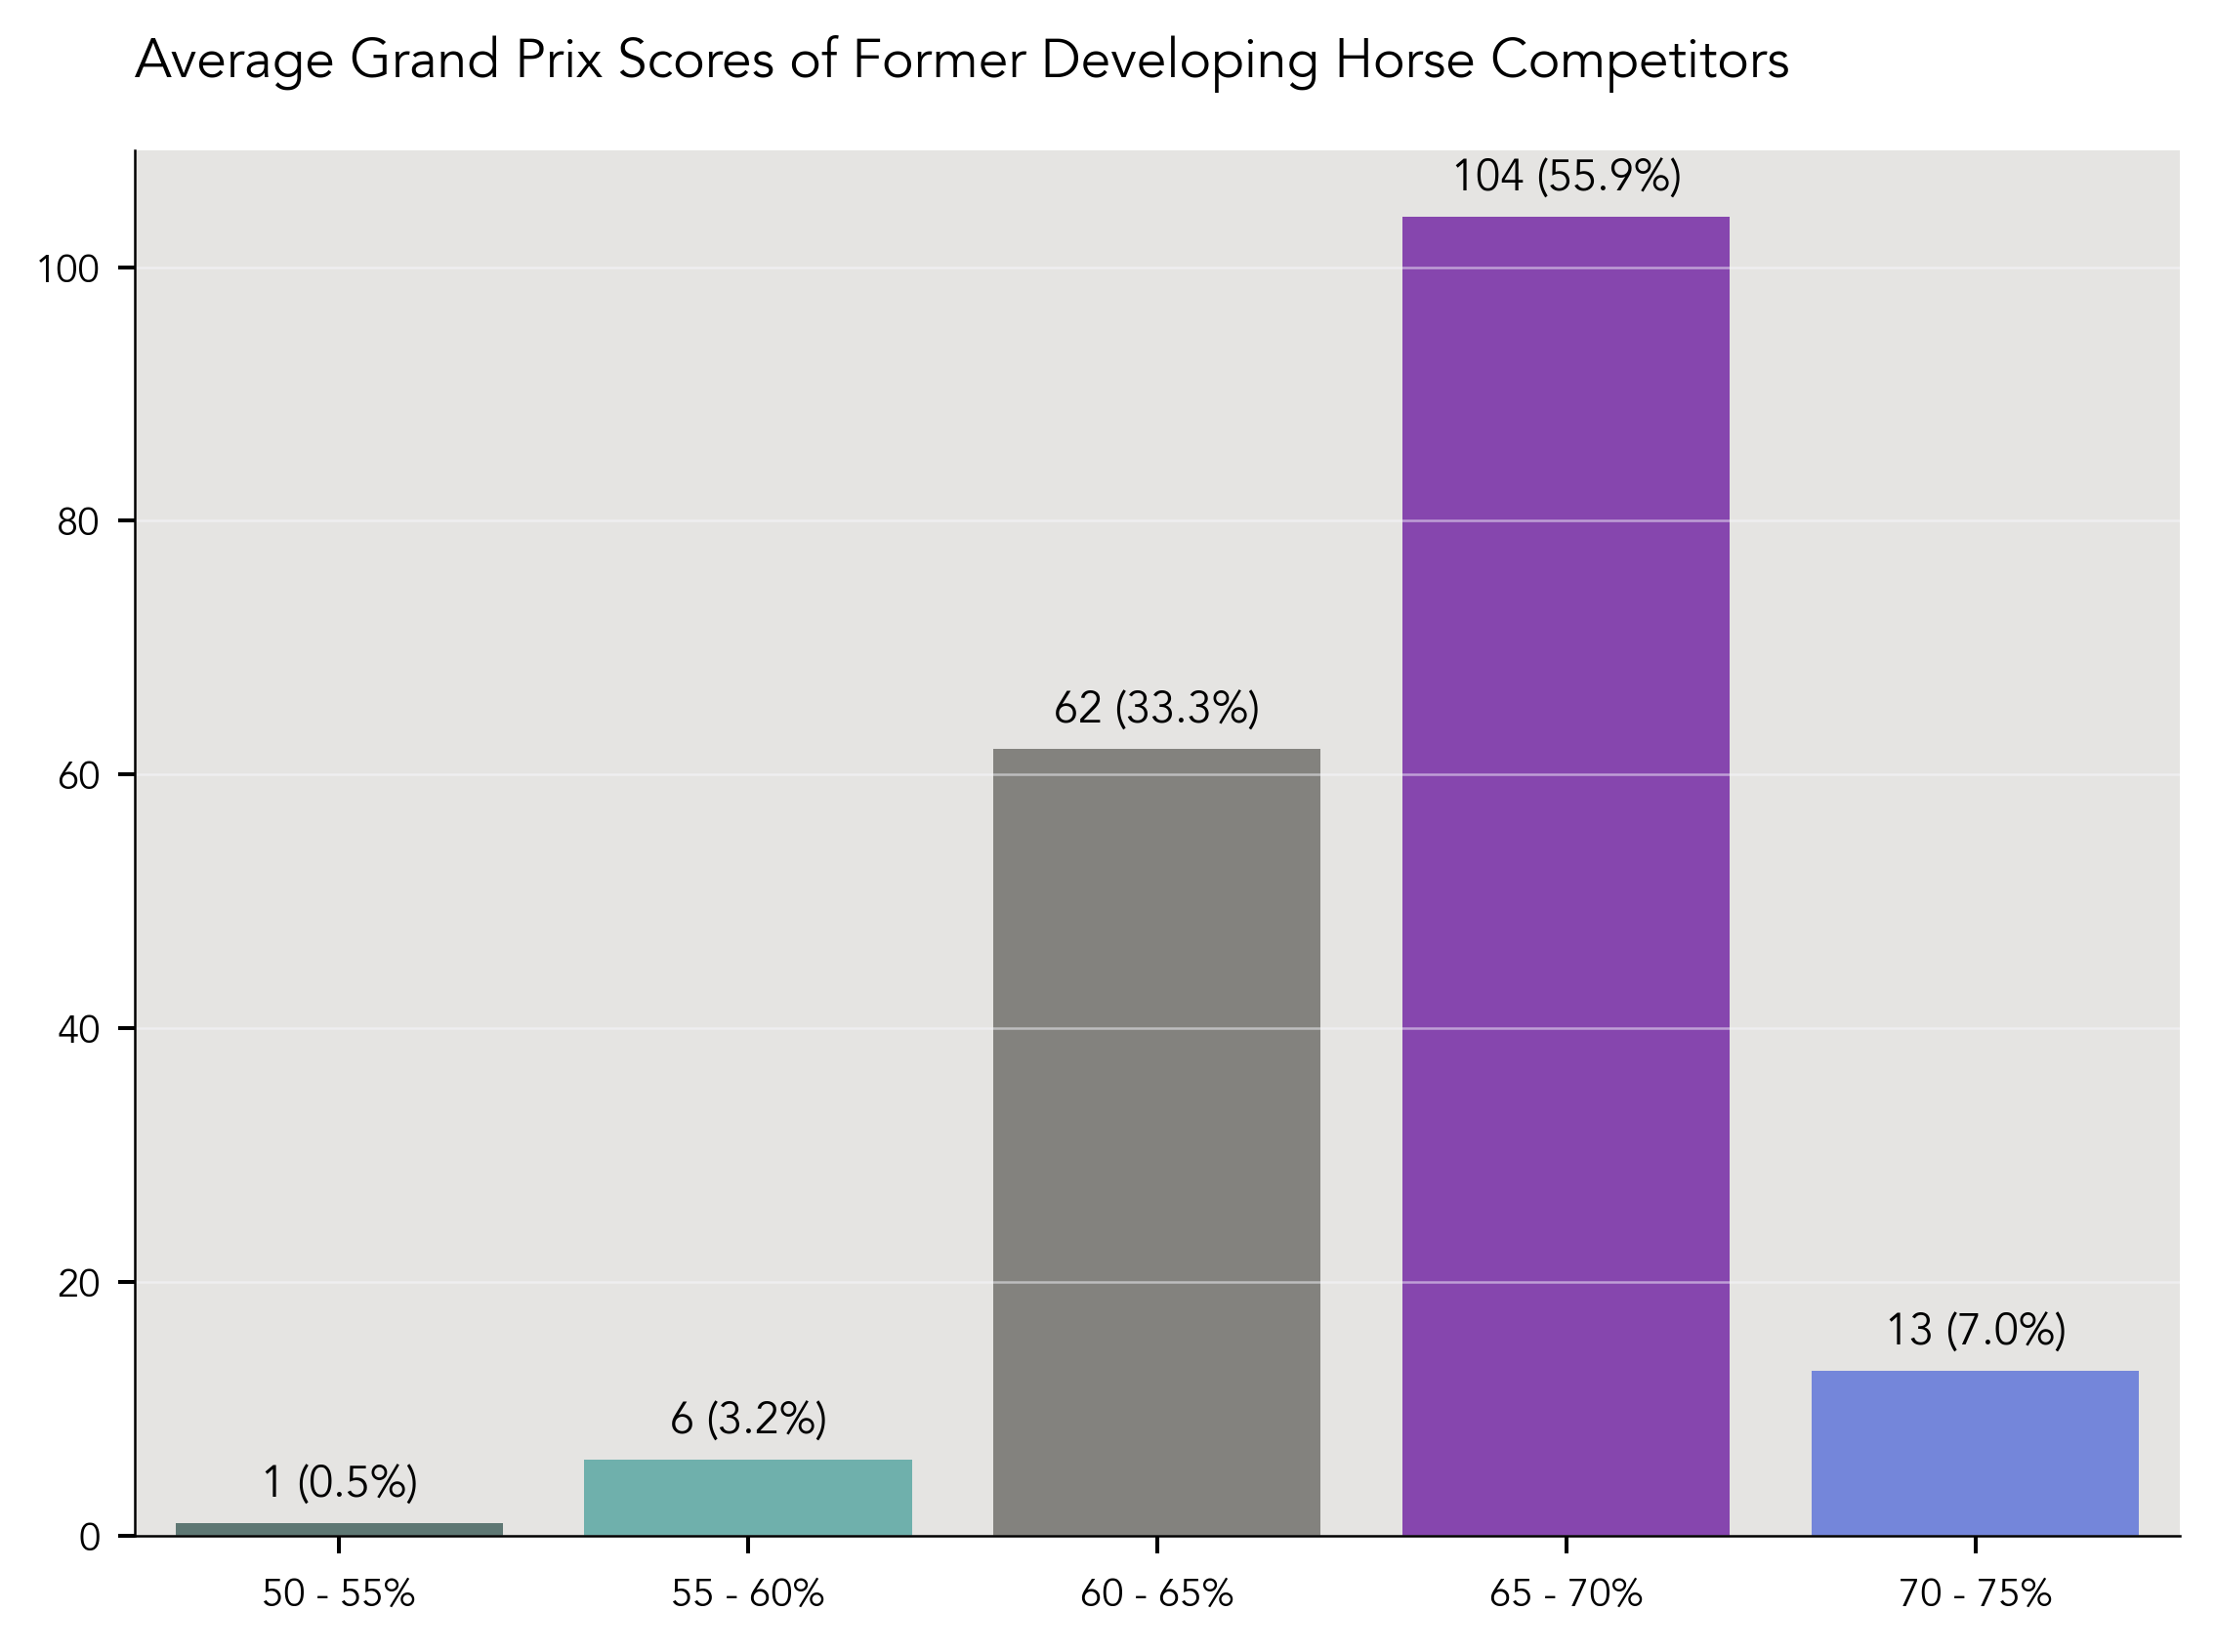

In [44]:
# create countplot of average Grand Prix scores of former Developing Horse competitors

gp_dev_horses = merged_df.loc[(merged_df['Year'] <= 2023) &
                             (merged_df['Division'].str.contains('DHPSG|DHGP')) & (merged_df['Highest Level'] == 'Grand Prix')].copy()

# drop duplicate USDF numbers so we only count each horse once
gp_dev_horses = gp_dev_horses.drop_duplicates(subset=['USDFNumber'])

gp_dev_count = len(gp_dev_horses)

gp_dev_horses['AverageGP'] = gp_dev_horses['AverageGP'].astype(float)

# create labels
labels = ['50 - 55%', '55 - 60%', '60 - 65%', '65 - 70%', '70 - 75%']

# cut bins
gp_dev_horses['bin'] = pd.cut(gp_dev_horses['AverageGP'], bins=range(50,76,5), labels=labels)


# set up countplot
ax = sns.countplot(x='bin', data=gp_dev_horses, palette=['#37615b', '#44b0ab', '#6c6b64', '#7209b7', '#4361ee'], hue='bin', alpha=0.8)

# add annotation for count and percentage 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/gp_dev_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=9)

# set xticks, xlabel, and title
ax.set_title('Average Grand Prix Scores of Former Developing Horse Competitors', loc='left')
ax.set_xlabel(None)
ax.set_ylabel(None)

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-gp-average-score.png')
plt.show()